In [1]:
import os
import sys
import scipy.io
import scipy.misc
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
from utils import *
import numpy as np
import tensorflow as tf
from  model_functions import *
%matplotlib inline

In [2]:
model = load_vgg_model("Imagenet vgg/imagenet-vgg-verydeep-19.mat")

C:\Users\Sarthak\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


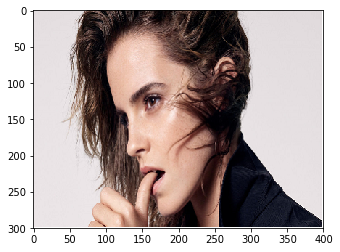

In [3]:
content_image = scipy.misc.imread("content/emma1.png")
imshow(content_image)

C:\Users\Sarthak\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


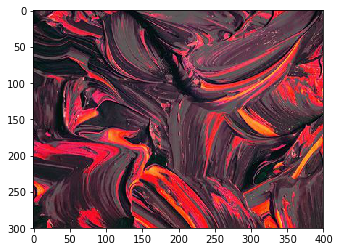

In [4]:
style_image = scipy.misc.imread("styles/style4.jpg")
imshow(style_image)

In [5]:
STYLE_LAYERS = [
    ('conv1_1', 0.25),
    ('conv2_1', 0.25),
    ('conv3_1', 0.25),
    ('conv4_1', 0.25),
    ('conv5_1', 0.25)]

In [6]:
tf.reset_default_graph()

with tf.Session() as test:
    np.random.seed(3)
    J_content = np.random.randn()    
    J_style = np.random.randn()
    J = total_cost(J_content, J_style)
    print("J = " + str(J))

J = 84.21454373874882


In [7]:
tf.reset_default_graph()
sess = tf.InteractiveSession()

In [8]:
content_image = scipy.misc.imread("content/emma1.png")
content_image = reshape_and_normalize_image(content_image)
content_image.shape

C:\Users\Sarthak\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


(1, 300, 400, 3)

In [9]:
style_image = scipy.misc.imread("styles/style4.jpg")
style_image = reshape_and_normalize_image(style_image)
style_image.shape

C:\Users\Sarthak\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


(1, 300, 400, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


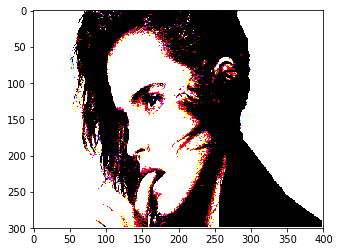

In [10]:
generated_image = generate_noise_image(content_image)
imshow(generated_image[0])

In [11]:
model = load_vgg_model("Imagenet vgg/imagenet-vgg-verydeep-19.mat")
sess.run(model['input'].assign(content_image))

# Select the output tensor of layer conv4_2
out = model['conv4_2']

# Set a_C to be the hidden layer activation from the layer we have selected
a_C = sess.run(out)

# Set a_G to be the hidden layer activation from same layer. Here, a_G references model['conv4_2'] 
# and isn't evaluated yet.
a_G = out

# Compute the content cost
J_content = compute_content_cost(a_C, a_G)

In [12]:
sess.run(model['input'].assign(style_image))
J_style = compute_style_cost(model, STYLE_LAYERS, sess)

In [13]:
J = total_cost(J_content, J_style, alpha = 30, beta = 70)
optimizer = tf.train.AdamOptimizer(2.0)
train_step = optimizer.minimize(J)

In [14]:
model_nn(sess, generated_image, model, train_step, J, J_content, J_style)

Iteration 0 :
total cost = 53202320000.0
content cost = 8139.4033
style cost = 760029630.0
Iteration 20 :
total cost = 6419034000.0
content cost = 28315.74
style cost = 91688350.0
Iteration 40 :
total cost = 2414599400.0
content cost = 28331.275
style cost = 34482136.0
Iteration 60 :
total cost = 1383574000.0
content cost = 29571.605
style cost = 19752670.0
Iteration 80 :
total cost = 958727700.0
content cost = 30476.521
style cost = 13683048.0
Iteration 100 :
total cost = 725732740.0
content cost = 31200.465
style cost = 10354239.0
Iteration 120 :
total cost = 582002560.0
content cost = 31795.453
style cost = 8300695.5
Iteration 140 :
total cost = 485845280.0
content cost = 32295.941
style cost = 6926806.0
Iteration 160 :
total cost = 417559300.0
content cost = 32715.17
style cost = 5951112.0
Iteration 180 :
total cost = 366790620.0
content cost = 33075.652
style cost = 5225691.0


array([[[[  92.82969  ,   81.60714  ,  101.840706 ],
         [  92.486496 ,   44.4751   ,   60.01386  ],
         [  97.330765 ,   55.31534  ,   55.86587  ],
         ...,
         [  64.79803  ,   81.18396  ,  112.481094 ],
         [  51.828514 ,   85.37405  ,   99.7575   ],
         [  56.95346  ,  110.583885 ,  136.46806  ]],

        [[  72.892334 ,   51.05852  ,   69.584564 ],
         [  93.24422  ,   45.29907  ,   36.624638 ],
         [ 113.901726 ,   42.03879  ,   78.6221   ],
         ...,
         [  51.24724  ,   78.56872  ,  106.41279  ],
         [  57.073566 ,   41.685078 ,   38.449368 ],
         [  34.635635 ,   74.18717  ,   48.617268 ]],

        [[ 104.27728  ,   49.535473 ,   82.156815 ],
         [ 101.37639  ,   29.078312 ,   61.57109  ],
         [ 106.8965   ,   51.655758 ,   83.246956 ],
         ...,
         [  82.73835  ,   18.668875 ,  107.73113  ],
         [  76.74187  ,    6.1799583,   70.43736  ],
         [  85.649666 ,   56.157967 ,   66.05354  ]],

Text(0.5,1,'After')

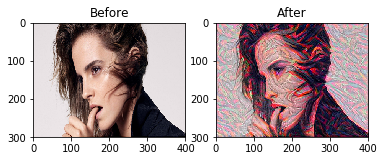

In [15]:
fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(Image.open('content/emma1.png'))
a.set_title('Before')

a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(Image.open('styled_output/final_generated_image.jpg'))
a.set_title('After')